# Multinomial_regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label_species']=le.fit_transform(df['species'])
#df['Loan_Status']=le.fit_transform(df['Loan_Status'])
#df['Education']=le.fit_transform(df['Education'])

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,label_species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [7]:
x=df.drop(columns=["species","label_species"])
y=df["label_species"]

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [34]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial')
model.fit(xtrain,ytrain)

C:\Users\Krishna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [35]:
ypred=model.predict(xtest)

In [36]:
ypred

array([2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 1, 0, 2, 0])

In [37]:
ytest.value_counts()

0    16
1     8
2     6
Name: label_species, dtype: int64

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
cm=confusion_matrix(ytest,ypred)
cm

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  6]], dtype=int64)

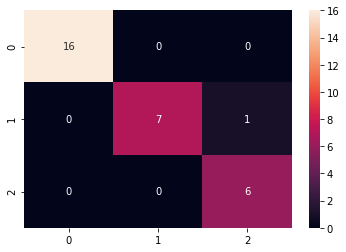

In [40]:
sns.heatmap(cm,annot=True)

In [41]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.93         8
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.96      0.95        30
weighted avg       0.97      0.97      0.97        30



In [42]:
acc=accuracy_score(ytest,ypred)
acc

0.9666666666666667

In [27]:
# feature Engg
# imbalance data       ---> imbalance data
# tune hyperparameter    ---> this three parameter are important for Logistic_regression